## DATA Reading

(179, 1024, 1024)


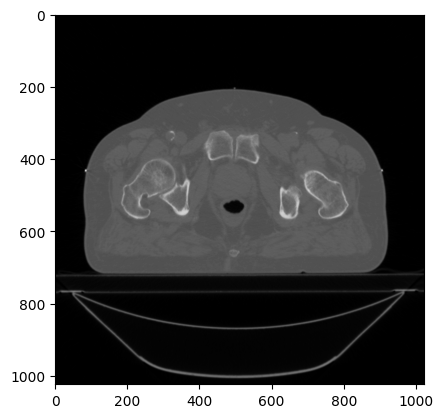

In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def load_images(dicom_dir):
    # Read the DICOM series
    series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(dicom_dir)
    if not series_ids:
        raise ValueError(f"No DICOM series found in directory: {dicom_dir}")
    
    # Load the DICOM series into a 3D image
    series = sitk.ImageSeriesReader()
    file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(dicom_dir, series_ids[0])
    series.SetFileNames(file_names)
    volume = series.Execute()  # This returns a 3D SimpleITK image

    # Convert to numpy array
    volume_array = sitk.GetArrayFromImage(volume)  # Shape: (Depth, Height, Width)
    return volume_array

# Load the DICOM images using SimpleITK
dicom_volume = load_images('Prostate-AEC-001-20241015T103640Z-001/Prostate-AEC-001/11-17-1992-NA-RX SIMULATION-82988/2.000000-Pelvis-13578')
print(dicom_volume.shape)  # Should print (Number of Slices, Height, Width)

# Original volume slice
plt.imshow(dicom_volume[88], cmap=plt.cm.gray)
plt.show()

### Normalization

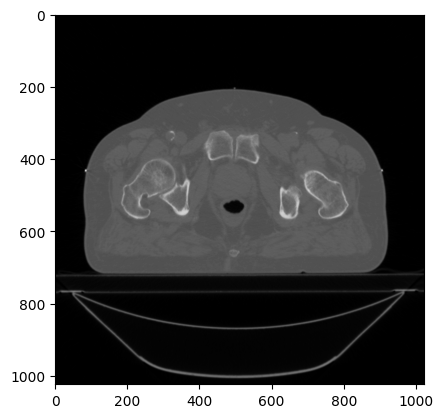

In [4]:
import numpy as np


# Assuming 'volume' is the 3D numpy array you loaded from DICOM
# Normalize the volume to the range [0, 1]
volume_min = np.min(dicom_volume)
volume_max = np.max(dicom_volume)
normalized_volume = (dicom_volume - volume_min) / (volume_max - volume_min)  # Now in range [0, 1]

# Original volume slice
plt.imshow(normalized_volume[88], cmap=plt.cm.gray)
plt.show()


### Histograms

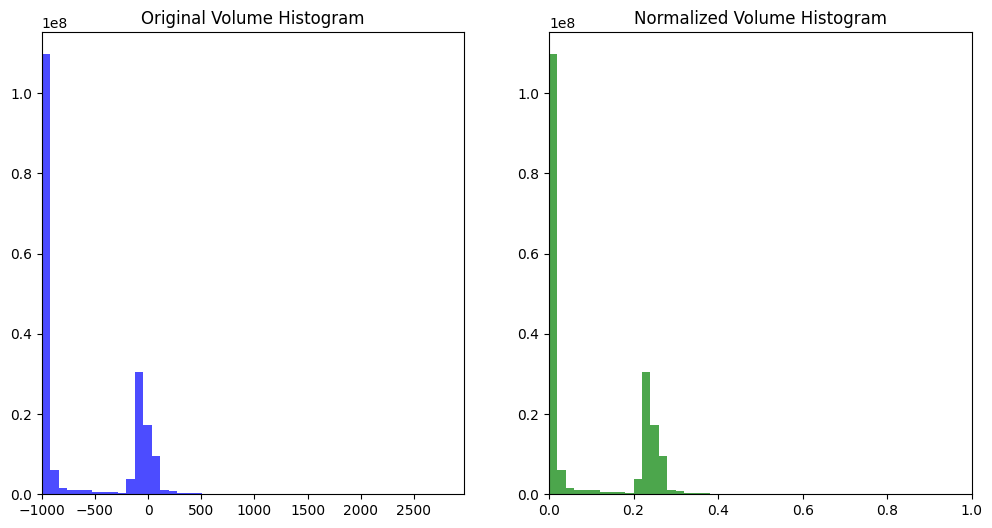

In [5]:
# Visualize a slice from the original and normalized volumes
slice_index = 88  

# Histogram of original and normalized volume
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dicom_volume.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Original Volume Histogram')
plt.xlim([np.min(dicom_volume), np.max(dicom_volume)])

plt.subplot(1, 2, 2)
plt.hist(normalized_volume.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Normalized Volume Histogram')
plt.xlim([0, 1])  # Adjust limits for normalized values

plt.show()

## Loading Contour data

In [1]:
import pydicom

contour_file = 'Prostate-AEC-001-20241015T103640Z-001/Prostate-AEC-001/11-17-1992-NA-RX SIMULATION-82988/0.000000-Contouring-60430/1-1.dcm'
dicom_data = pydicom.dcmread(contour_file)


In [7]:
def extract_prostate_contours(dicom_data, roi_name="Prostate"):
    contours = []
    
    # Check if the DICOM file has ROIContourSequence
    if 'ROIContourSequence' in dicom_data:
        # Loop through each ROIContourSequence entry
        for roi_contour in dicom_data.ROIContourSequence:
            # Check if there's an associated ROI name in StructureSetROISequence
            matching_roi = None
            for structure_set_roi in dicom_data.StructureSetROISequence:
                if structure_set_roi.ROINumber == roi_contour.ReferencedROINumber:
                    if structure_set_roi.ROIName == roi_name:
                        matching_roi = structure_set_roi
                        break

            # If the matching ROI is found and has contours
            if matching_roi:
                if 'ContourSequence' in roi_contour:
                    for contour in roi_contour.ContourSequence:
                        points = contour.ContourData
                        points_array = np.array(points).reshape(-1, 3)  # x, y, z coordinates
                        contours.append(points_array)
                else:
                    print(f"No ContourSequence found for {roi_name}.")
            else:
                print(f"ROI with name {roi_name} not found in StructureSetROISequence.")
    else:
        print("No ROIContourSequence found in the DICOM data.")
    
    return contours

# Extract prostate contours from the DICOM data
prostate_contours = extract_prostate_contours(dicom_data, roi_name="Prostate")
for idx, contour in enumerate(prostate_contours):
    print(f"Prostate Contour {idx}:")
    print(contour)

ROI with name Prostate not found in StructureSetROISequence.
ROI with name Prostate not found in StructureSetROISequence.
ROI with name Prostate not found in StructureSetROISequence.
ROI with name Prostate not found in StructureSetROISequence.
Prostate Contour 0:
[[-1.0670e+01  1.1465e+02 -1.0935e+03]
 [-9.7600e+00  1.1401e+02 -1.0935e+03]
 [-8.8500e+00  1.1401e+02 -1.0935e+03]
 [-7.9500e+00  1.1401e+02 -1.0935e+03]
 [-7.0400e+00  1.1407e+02 -1.0935e+03]
 [-6.1300e+00  1.1441e+02 -1.0935e+03]
 [-5.2200e+00  1.1476e+02 -1.0935e+03]
 [-5.0000e+00  1.1489e+02 -1.0935e+03]
 [-4.3100e+00  1.1523e+02 -1.0935e+03]
 [-3.4400e+00  1.1580e+02 -1.0935e+03]
 [-3.4100e+00  1.1582e+02 -1.0935e+03]
 [-2.5000e+00  1.1668e+02 -1.0935e+03]
 [-2.4700e+00  1.1671e+02 -1.0935e+03]
 [-1.7700e+00  1.1761e+02 -1.0935e+03]
 [-1.5900e+00  1.1797e+02 -1.0935e+03]
 [-1.3100e+00  1.1852e+02 -1.0935e+03]
 [-1.0500e+00  1.1943e+02 -1.0935e+03]
 [-8.8000e-01  1.2034e+02 -1.0935e+03]
 [-8.8000e-01  1.2125e+02 -1.0935e

In [67]:
# Print the structure of contour
for idx, contour in enumerate(prostate_contours):
    print(f"Prostate Contour {idx}:")
    print("Shape:", contour.shape)
    print("First few points:", contour[:5])

Prostate Contour 0:
Shape: (98, 3)
First few points: [[  -10.67   114.65 -1093.5 ]
 [   -9.76   114.01 -1093.5 ]
 [   -8.85   114.01 -1093.5 ]
 [   -7.95   114.01 -1093.5 ]
 [   -7.04   114.07 -1093.5 ]]
Prostate Contour 1:
Shape: (100, 3)
First few points: [[  -13.4    115.17 -1091.5 ]
 [  -12.49   115.14 -1091.5 ]
 [  -11.58   115.14 -1091.5 ]
 [  -10.67   115.03 -1091.5 ]
 [   -9.76   114.97 -1091.5 ]]
Prostate Contour 2:
Shape: (142, 3)
First few points: [[   -9.76   106.69 -1089.5 ]
 [   -9.54   106.72 -1089.5 ]
 [   -8.85   106.8  -1089.5 ]
 [   -7.95   106.91 -1089.5 ]
 [   -7.04   107.2  -1089.5 ]]
Prostate Contour 3:
Shape: (150, 3)
First few points: [[  -17.03   106.64 -1087.5 ]
 [  -16.12   106.58 -1087.5 ]
 [  -15.21   106.57 -1087.5 ]
 [  -14.3    106.42 -1087.5 ]
 [  -13.4    106.23 -1087.5 ]]
Prostate Contour 4:
Shape: (164, 3)
First few points: [[  -12.49   105.78 -1085.5 ]
 [  -11.58   105.35 -1085.5 ]
 [  -10.67   105.21 -1085.5 ]
 [   -9.76   105.04 -1085.5 ]
 [   -8

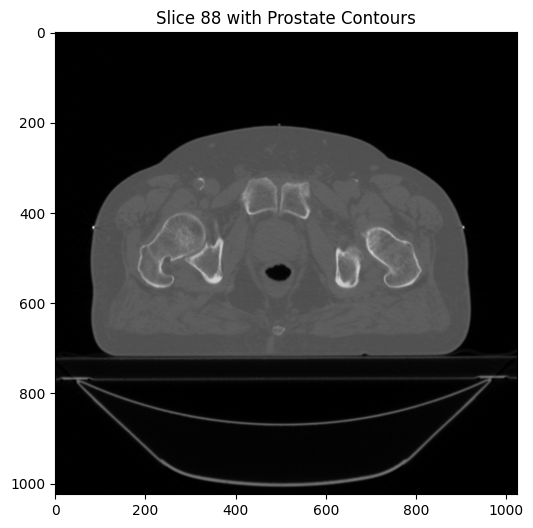

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a slice with the contour overlay
def show_slice_with_contour(ct_image, slice_idx, contours):
    # Get the slice image
    slice_image = ct_image[slice_idx, :, :]

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_image, cmap='gray')

    # Overlay the contour that corresponds to this slice using contour index
    if slice_idx < len(contours):
        contour = contours[slice_idx+75]  # Get the contour for the current slice
        plt.plot(contour[:, 0], contour[:, 1], 'r-', linewidth=5)  # Plot contour
    
    plt.title(f"Slice {slice_idx} with Prostate Contours")
    plt.show()

# Assuming your dicom_volume is a numpy array and prostate_contours contains the extracted contours
show_slice_with_contour(dicom_volume, slice_idx=88, contours=prostate_contours)

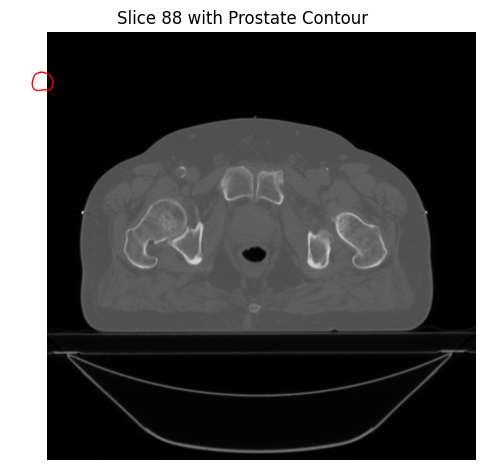

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a slice with the contour overlay for a specific contour index
def show_contour_by_index(ct_image, slice_index, contours):
    # Check if the contour index is valid
    if slice_index < 75 or slice_index >= len(contours)+74:
        print(f"Contour index {slice_index} is out of bounds. Please provide a valid index.")
        return

    # Get the slice image corresponding to the contour index
    slice_image = ct_image[slice_index, :, :]

    # Get the contour for the specified index
    contour = contours[slice_index-75]

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_image, cmap='gray')

    # Overlay the contour
    plt.plot(contour[:, 0], contour[:, 1], 'r-', linewidth=1)  # Plot contour in red

    plt.title(f"Slice {slice_index} with Prostate Contour")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Example usage
# Assuming your dicom_volume is a numpy array and prostate_contours contains the extracted contours
show_contour_by_index(dicom_volume, slice_index=88, contours=prostate_contours)
